In [2]:
# import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

### 1. Formulate the statement of the interpolation problem with Cubic Spline [mathematical formula]
(Сформулируйте постановку задачи интерполяции кубическим сплайном)

Задана сетка ($х_i$) и значения функции в звеньях сетки ($f(x_i)$). Необходимо построить функцию $U(x)$, способную вычислять $\hat{f}(x)$, который к тому же в точках $x_i$ совпадает с оригинальной функцией. 

$$ U(x) = s_i(x), x \in [x_{i-1}, x_i] $$
where 
$$ s_i(x) = s_i(x_i) + s_i'(x_i)(x-x_i) + \frac{s_i''(x_i)}{2}(x-x_i)^2 + \frac{s_i'''(x_i)}{6}(x-x_i)^3 $$

### 2. Formulate the functional and differential compatibility conditions [mathematical formula]
(Сформулируйте условия функциональной и дифференциальной совместимости)

Из Киреева:
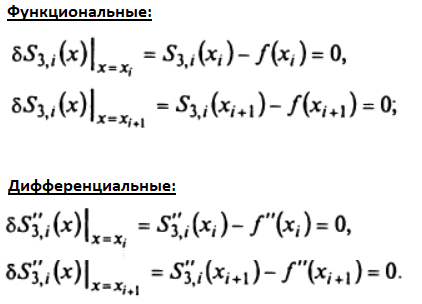

### 3. Formulate stitching conditions [mathematical formula]
(Сформулируйте условия сшивки)

$ s_{i-1}'(x_{i-1}) = s_i'(x_{i-1}) $

$ s_{i+1}'(x_{i}) = s_i'(x_{i}) $

или (из Киреева):
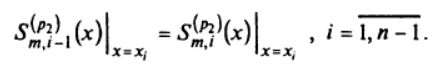

N.B. Сшивка про интерполянты, предыдущие условия про интерполянт и про оригинальную функцию

### 4. Justify why these conditions provide you with the required smoothness [thesis text, no more than 500 characters]
(Объясните, почему эти условия обеспечивают вам необходимую гладкость)

Кусочно-гладкая функция — функция, определённая на множестве вещественных чисел, дифференцируемая на каждом из интервалов, составляющих область определения

Наши условия гарантируют гладкость минимум $ C^1 $, т.к. на отрезке $ (x_i, x_{i+1}) $ наша функция - полином 3й степени. На концах также на концах ввиду условию сшивки будет выполняться дифференциальное своейство кусочно-гладкой функции.

### 5. Derive dependency formula: the dependence of the second derivatives at the grid nodes on the increment of the function (the function values difference on the grid nodes). [Mathematical formulas derivation. Detailed, with clear transitions]
(Выведите формулу зависимости: зависимость вторых производных в узлах сетки от приращения функции (разность значений функции на узлах сетки))

Общая формула сплайна:

$ S_i(x) = a_{0,i} + a_{1,i}(x-x_i) + a_{2,i}(x-x_i)^2 + a_{3,i}(x-x_i)^3 $

<br>

Его вторая производная:

$ S_i''(x) = 2a_{2,i} + 6a_{3,i}(x-x_i) $

<br>

Из дифференциальных условий имеем (п.2):

$ S_i''(x_i) = f''(x_i) $

$ 2a_{2,i} + 6a_{3,i}(x_i - x_i) = f''(x_i) $

$ 2a_{2,i} = f''(x_i) $

<br>
<br>

$ S_i''(x_{i+1}) = f''(x_{i+1}) $

$ 2a_{2,i} + 6a_{3,i}h_{i+1} = f''(x_i+1) $

<br>
<br>

Также потребуется:

$ S_i(x_i) = f(x_i) $

$ a_{0,i} = f(x_i) $

<br>
<br>

$ S_i(x_{i+1}) = f(x_{i+1}) $

$ a_{0,i} + a_{1,i} h_{i+1} + a_{2,i}h_{i+1}^2 + a_{3,i}h_{i+1}^3 = f(x_{i+1}) $

<br>
<br>

Выразим коэффициенты явно:

1) $ a_{0,i} = f(x_i) $

2) $  a_{2,i} = \frac{f''(x_i)}{2} $

3) $  a_{3,i} = \frac{f''(x_{i+1}) - 2a_{2,i}}{6h_{i+1}} = \frac{f''(x_{i+1}) - f''(x_i)}{6h_{i+1}} $

4) $ a_{1,i} = \frac{f(x_{i+1}) - a_{0,i} - a_{2,i}h_{i+1}^2 - a_{3,i}h_{i+1}^3}{h_{i+1}} =  \frac{f(x_{i+1}) - f(x_i)}{h_{i+1}} - \frac{f''(x_i)}{2}h_{i+1} - \frac{f''(x_{i+1}) - f''(x_i)}{6}h_{i+1} $

При $ h_{i+1} = x_{i+1} - x_i $

# Но! нужно довести до формулы 4.72

Выразим:

$ S_i'(x) = a_{1,i} + 2a_{2,i}(x-x_i) + 3a_{3,i}(x-x_i)^2 $

<br>

Подставим в условие сшивки:

$ S_i'(x_{i+1}) = S_{i+1}'(x_{i+1}) $

$ a_{1,i} + 2a_{2,i}(x_{i+1}-x_i) + 3a_{3,i}(x_{i+1}-x_i)^2 = a_{1,i+1} $

т.к. у нас шаг стабильный, то введём $ h = x_{i-1} - x_i $

... (дальнейший вывод можно убиться писать в LaTeX (что собсно и не сделал Киреев), но у меня есть пруфы, что мы вывели на доске). Сводим все $m$ влево, остальную поднаготную вправо:

$$ \frac{m_i}{6}h + \frac{2}{3}m_{i+1}h + \frac{m_{i+2}}{6}h = \frac{\Delta f_{i+1}}{h} - \frac{\Delta f_{i}}{h} $$

где $ \Delta f_i = f(x_i) - f(x_{i-1}) $ 

### 6. Create a system of equations using this formula [Matrix representation. Mathematical formulas]

Общий вид тридиагональной матрицы:
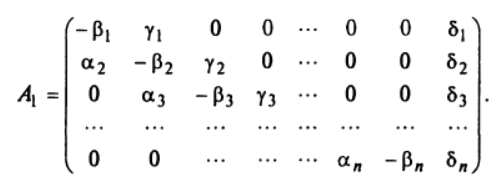
<br>
Наша матрица:
\begin{equation*}
A = 
\begin{pmatrix}
 4 h & h & 0     & ...\\ 
  h & 4h & h & ...\\ 
 ... & ... & ... & ...\\
... & ... & h & 4h
\end{pmatrix}
\vec{m}
\end{equation*}

где $ \vec{m}$  это $[m_1...m_{n-1}]$

$$ A \vec{m} = \vec{\delta} $$

$$ \delta_i = 6 \frac{y_{i+1} - 2 y_i + f_{i-1}}{h} $$

### 7. Explain what is an unknown variable in this system. whether the system is closed with respect to an unknown variable. What is missing for closure. [Text, no more than 200 characters]
(Объясните, что такое неизвестная переменная в этой системе. 
является ли система закрытой по отношению к неизвестной переменной.
Чего не хватает для закрытия?)

Неизвестные переменные - это $a_{n,i}$, $n \in {0,1,2,3}$. Т.к. они вычисляются из $ S_i(x_i)$ и $ S_i''(x_i) $, то уравнения позволяют найти 3N-2 из 3N условий. 2 пропадают, т.к. у нас не определена вторая производная в концевых точках (i=0, i=N). Эти значения беруться произвольно (обычно $ S_1(x_0) = 0 $ и $ S_{N}(x_N) = 0$).

### 8. Bring this matrix to the appropriate form to use the Tridiagonal matrix algorithm [Mathematical derivation. Use Gauss Elimination]

Имея исходную матрицу, можно построить новую следующим образом:
из матрицы 4*M при помощи исходной матрицы занулить нижнюю диагональ (начиная со второй строчки).

Так мы получим явные коэффициенты. Приведя главную диагональ к единицам, получим матрицу как у Киреева:
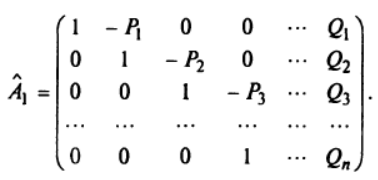

Побочные формулы:

$$ P_i = \frac{\gamma_i}{\beta_i - \alpha_iP_{i-1}}$$

$$ Q_i = \frac{\alpha_i Q_{i-1} - \delta_i}{\beta_i - \alpha_i P_{i-1}} $$

### 9. Derive formulas of direct pass and reverse pass of Tridiagonal matrix algorithm [Mathematical formals]

Имея матрицу $ \hat{A} $, выражаем $ x_n = Q_n $. Тогда для $x_i$ справедливо 
$$x_i = P_i x_{i+1} + Q_i $$

### 10. Implement code prototype of the future algorithm implementation. Classes/methods (if you use OOP), functions. The final implementation (on language chosen by you) should not differ from the functions declared in the prototype. [Python code]

(Реализовать код-прототип будущей реализации алгоритма. 
Классы / методы (Если вы используете ООП), функции. 
Конечная реализация (на выбранном вами языке) не должна отличаться от функций, объявленных в прототипе)

In [73]:
def cubic_spline(x, y):
    """
    x,y - x_i and f(x_i) array-like collections. For now assumed that x_i+1 - x_i is constant h
    
    return approximation function (or object) 
    """
    h = x[1] - x[0]
#     N = len(x)
    
    deltas = []
    for i in range(1,len(x)-1):
        deltas.append(6/h *(y[i+1] - 2*y[i] + y[i-1]))
    gamma = h
    beta  = -4*h
    alpha = h
    
    N = len(deltas)
    
    P = [gamma/beta]
    Q = [(-1) * deltas[0] / beta]
    for i in range(1,N - 1):
        P_prev = P[-1]
        P.append(gamma / (beta - alpha * P_prev))
        Q.append((alpha*Q[-1] - deltas[i]) / (beta - alpha*P_prev))
        
#     print(len(P), len(Q))
    
    m = [(alpha*Q[-1] - deltas[-1])/(beta - alpha*P[-1])] # x_n -> reversed
    for i in range(N-2, -1, -1):
        m.append(P[i] * m[-1] + Q[i])
    m.append(0.0)
    m = list(reversed(m))
    m.append(0.0)
        
    return m
    
# Check on example from https://towardsdatascience.com/numerical-interpolation-natural-cubic-spline-52c1157b98ac
# By the way there is mistake in original post in results that was fixed
data = [(1, 0), (2, 1), (3, 0), (4,1), (5,0)]
x = []
y = []
for i in data:
    x.append(i[0])
    y.append(i[1])
    
m = cubic_spline(x,y) 
print(m)

def calculate(p, x, y, m):
    """
    Need some params to generify
    """
    i = 0
    h = x[1] - x[0]
    dx = p - x[i]
    df = y[i+1] - y[i]
    dm = m[i+1] - m[i]
    res = y[i]
    res += (df/h - h*m[i]/2 - h*dm/6)*dx
    res += m[i]/2 * dx**2 + dm/6/h * dx**3
    
    return res
    

print(calculate(1.5, x, y, m)) ## 0.7679 expected
    
# Expected coefficients: 
[0.0, -30/7, 36/7, -30/7, 0.0]

2 2
[0.0, -4.285714285714286, 5.142857142857142, -4.285714285714286, 0.0]
0.7678571428571429


[0.0, -4.285714285714286, 5.142857142857143, -4.285714285714286, 0.0]

### 11. Derive formula of Cubic Spline method error [Mathematical formulas]

Из Киреева имеем тривиальные 2 левых равенства для промежутка сетки:
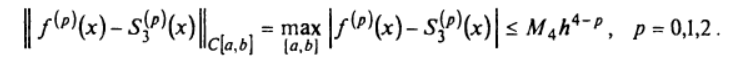

Правое чуть посложнее: оно говорит, что порядок апроксимации по мажоранте не понижается при апроксимации производных функции (он равен 4, что видимо взято из остаточного члена ряда), что нельзя сказать о порядке шага. К тому же он даёт ограничение сверху, а не равенство.

### 12. Rate the complexity of the algorithm [Text, and rate in terms of big O, no more than 100 characters]

 2N - прогонка вперёд, назад. 
 
 => сложность алгоритма O(N)

### Congrats!

За скрины из Киреева извини.